## Case Study 1(House Prices)

Data fields
Here's a brief version of what you'll find in the data description file.

    SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale

### 1.1 import some necessary librairies

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 import and put the train and test datasets in  pandas dataframe

In [18]:
df_test=pd.read_csv("test (1).csv")
df_train=pd.read_csv("train (1).csv")

df=pd.concat([df_train,df_test],axis=1)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,120.0,0.0,NaN,MnPrv,NaN,0.0,6.0,2010.0,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0.0,0.0,NaN,NaN,Gar2,12500.0,6.0,2010.0,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0.0,0.0,NaN,MnPrv,NaN,0.0,3.0,2010.0,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0.0,0.0,NaN,NaN,NaN,0.0,6.0,2010.0,WD,Normal
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,144.0,0.0,NaN,NaN,NaN,0.0,1.0,2010.0,WD,Normal


### 1.3 display the first five rows of the train dataset.

In [19]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 1.4 display the first five rows of the test dataset.

In [20]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### 1.5 check the numbers of samples and features

In [21]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


### 1.6 Save the 'Id' column

In [22]:
df_id_train=df_train.Id
df_id_train.head()

0    1
1    2
2    3
3    4
4    5
Name: Id, dtype: int64

### 1.7 Now drop the  'Id' colum since it's unnecessary for  the prediction process.

In [23]:
df_test.drop(columns=["Id"],inplace=True)

df_test.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [24]:
df_train.drop(columns=["Id"],inplace=True)

df_train.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 1.8 check again the data size after dropping the 'Id' variable

In [25]:
df_test.size

115261

## 1.9 Data Processing

### 1.9a) Check the Outliers for  train['GrLivArea'],  train['SalePrice']. And your observation?

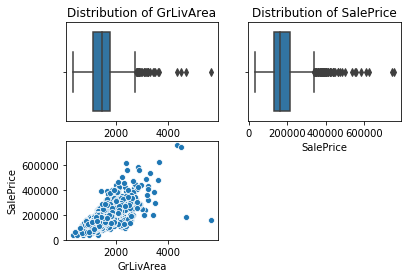

In [26]:
# create subplots 
plt.subplot(2,2,1) #subplot(221)
plt.title("Distribution of GrLivArea")
sns.boxplot(data=df_train,x=df_train.GrLivArea)
#plt.ylabel("Asia")

plt.subplot(2,2,2) #subplot(211)
plt.title("Distribution of SalePrice")
sns.boxplot(data=df_train,x=df_train.SalePrice)

#create scatter plots for train['GrLivArea'],  train['SalePrice']
plt.subplot(2,2,3)
#plt.hist(europe_2007.gdpPerCapita,5,range=(0,50000),edgecolor="black")
sns.scatterplot(data=df_train,x=df_train.GrLivArea,y=df_train.SalePrice)
#plt.ylabel("Europe")
plt.show()


#### observation:


In [47]:
#In Distribution of GrLivArea & Distribution of SalePrice, there are many positive outliers.Also, there is positive relation 
#between Saleprice and GrLiveArea.

### 1.9 b) Deleting outliers.And your observation?

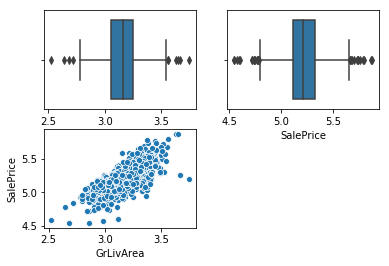

In [27]:
#Check the graphic again
df_train.GrLivArea=pd.DataFrame(np.log10(df_train.GrLivArea))
df_train.SalePrice=pd.DataFrame(np.log10(df_train.SalePrice))

plt.subplot(2,2,1)
sns.boxplot(data=df_train,x=df_train.GrLivArea)
plt.subplot(2,2,2)
sns.boxplot(data=df_train,x=df_train.SalePrice)


#create scatterplot for train['GrLivArea'], train['SalePrice']
plt.subplot(2,2,3)
sns.scatterplot(data=df_train,x=df_train.GrLivArea,y=df_train.SalePrice)

#### observation:
  

In [10]:
#We used log to decrease the positive outliers.

### 1.9 c)Check the Outliers in box plot  for train['GrLivArea'].And your observation?

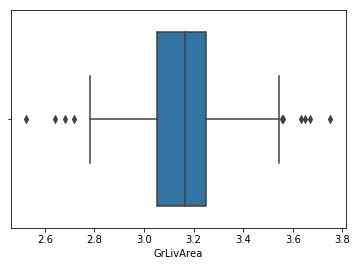

In [28]:
sns.boxplot(data=df_train,x=df_train.GrLivArea)

### 1.9 d)Check Again the Outliers in box plot  for train['GrLivArea'].And your observation?

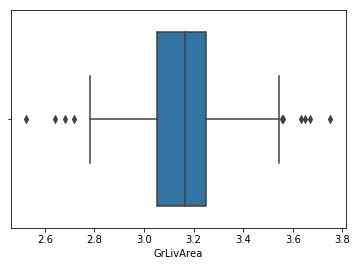

In [29]:

sns.boxplot(data=df_train,x=df_train.GrLivArea)

In [30]:
# We used log to reduce positive outliers.

## 1.10 Checking the skeweness for saleprice.And your observation?

In [30]:
import statsmodels.api as sm

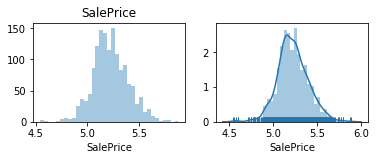

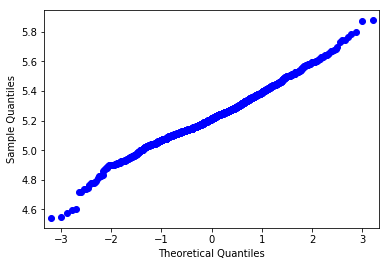

In [16]:
# create histogram for saleprice
plt.subplot(2,2,1) #subplot(221)
plt.title("SalePrice")
sns.distplot(df_train.SalePrice,kde=False)


# Get the fitted parameters used by the function

#Now plot the distribution
plt.subplot(2,2,2) #subplot(211)

sns.distplot(df_train.SalePrice,kde=True,rug=True)


#Get also the QQ-plot
sm.qqplot(df_train.SalePrice)
plt.show()

### observation:


### 1.10 a) Apply Log-transformation of the target variable.And your observation?

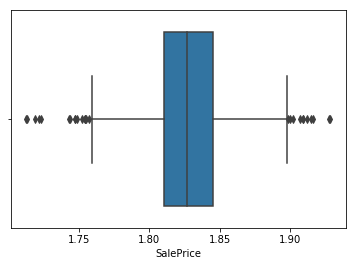

In [31]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df_train.SalePrice = pd.DataFrame(np.log1p(df_train.SalePrice))
sns.boxplot(data=df_train,x=df_train.SalePrice)

# After applying the log transform, the positive outliers are reducced.

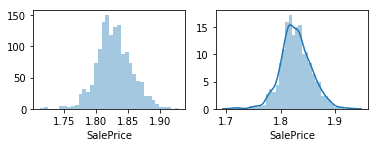

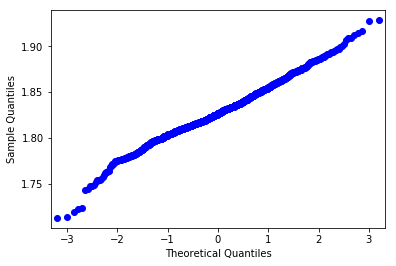

In [35]:
#Check the new distribution 
plt.subplot(2,2,1)
sns.distplot(df_train.SalePrice,kde=False)

# Get the fitted parameters used by the function


#Now plot the distribution
plt.subplot(2,2,2)
sns.distplot(df_train.SalePrice,kde=True)
#Get also the QQ-plot
sm.qqplot(df_train.SalePrice)
plt.show()

#### observation:


### 1.11 concatenate the train and test data in the same dataframe

In [36]:
#all_data = pd.concat
all_data = pd.concat([df_train,df_test],axis=0,sort=False)
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,1.843578
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,1.834001
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,1.848341
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,1.815822
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,1.855976


In [37]:
# Drop the SalePrice
all_data.drop(columns=['SalePrice'],axis=1,inplace=True)
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


### 1.12 Cecking the all Missing Data?

In [38]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 79 columns):
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non

### 1.13 plot the missing values using barplot?

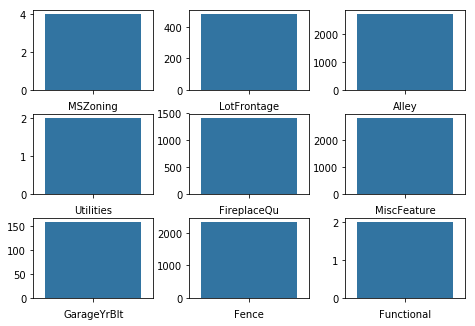

In [39]:
#create subplots
plt.subplot(3,3,1)
sns.barplot(data=all_data, x = 2919-all_data.MSZoning.count(),orient='v')
plt.xlabel('MSZoning')

plt.subplot(3,3,2)
sns.barplot(data=all_data, x = 2919-all_data.LotFrontage.count(),orient='v')
plt.xlabel('LotFrontage')

plt.subplot(3,3,3)
sns.barplot(data=all_data, x = 2919-all_data.Alley.count(),orient='v')
plt.xlabel('Alley')

plt.subplot(3,3,4)
sns.barplot(data=all_data, x = 2919-all_data.Utilities.count(),orient='v')
plt.xlabel('Utilities')

plt.subplot(3,3,5)
sns.barplot(data=all_data, x = 2919-all_data.FireplaceQu.count(),orient='v')
plt.xlabel('FireplaceQu')

plt.subplot(3,3,6)
sns.barplot(data=all_data, x = 2919-all_data.MiscFeature.count(),orient='v')
plt.xlabel('MiscFeature')

plt.subplot(3,3,7)
sns.barplot(data=all_data, x = 2919-all_data.GarageYrBlt.count(),orient='v')
plt.xlabel('GarageYrBlt')

plt.subplot(3,3,8)
sns.barplot(data=all_data, x = 2919-all_data.Fence.count(),orient='v')
plt.xlabel('Fence')


plt.subplot(3,3,9)
sns.barplot(data=all_data, x = 2919-all_data.Functional.count(),orient='v')
plt.xlabel('Functional')
#create barplot for all missing values
plt.subplots_adjust(left=15, bottom=15, right=16, top=16, wspace=0.3, hspace=0.3)



### 1.14 check the Data Correlation using heatmap.And your observation?

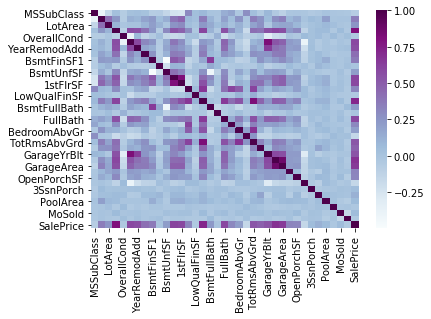

In [40]:
#Correlation map to see how features are correlated with SalePrice
sns.heatmap(df_train.corr(),cmap='BuPu')

#### observation:
   

# As can be seen from the above heatmap, the Lot area is having the highest correlation with Sale Price then followed by Low quality finished square feet.

#### 1.15 Imputing missing values

#### PoolQC : 
data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.

#### MiscFeature : 
data description says NA means "no misc feature"

#### Alley : 
data description says NA means "no alley access"

Fence : 
data description says NA means "no fence"

### 1.16 Check remaining missing values if any 

In [42]:
all_data.drop(columns=['PoolQC', 'MiscFeature', 'Alley'],axis=1,inplace=True)

In [43]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 76 columns):
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non-null object
MasVnrType       2895 no

In [44]:
# FireplaceQu : data description says NA means "no fireplace"
all_data.FireplaceQu.fillna('no fireplace',inplace=True)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 76 columns):
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non-null object
MasVnrType       2895 no

In [49]:
#LotFrontage : Since the area of each street connected to the house property most likely have a similar
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
a = all_data.LotFrontage.groupby(all_data.Neighborhood).median()
a
all_data.LotFrontage.fillna(a,inplace=True)
a

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    51.0
ClearCr    80.5
CollgCr    70.0
Crawfor    70.0
Edwards    65.0
Gilbert    64.0
IDOTRR     60.0
MeadowV    21.0
Mitchel    74.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    89.0
NridgHt    92.0
OldTown    60.0
SWISU      60.0
Sawyer     72.0
SawyerW    67.0
Somerst    72.5
StoneBr    60.0
Timber     82.0
Veenker    80.0
Name: LotFrontage, dtype: float64

In [ ]:
dic = dict(a)

In [50]:
def GetMed(name):
    return dic.values

In [52]:
all_data.LotFrontage.fillna(lambda x : GetMed(x),inplace=True)

In [53]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 76 columns):
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2919 non-null object
LotArea          2919 non-null int64
Street           2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non-null object
MasVnrType       2895 non

In [54]:
# GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
all_data.GarageType.fillna('None',inplace=True)
all_data.GarageFinish.fillna('None',inplace=True)
all_data.GarageQual.fillna('None',inplace=True)
all_data.GarageCond.fillna('None',inplace=True)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 76 columns):
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2919 non-null object
LotArea          2919 non-null int64
Street           2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non-null object
MasVnrType       2895 non

In [55]:
# GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)
all_data.GarageYrBlt.fillna(0,inplace=True)
all_data.GarageArea.fillna(0,inplace=True)
all_data.GarageCars.fillna(0,inplace=True)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 76 columns):
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2919 non-null object
LotArea          2919 non-null int64
Street           2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non-null object
MasVnrType       2895 non

In [56]:
## BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement
all_data.BsmtFinSF1.fillna(0,inplace=True)
all_data.BsmtFinSF2.fillna(0,inplace=True)
all_data.BsmtUnfSF.fillna(0,inplace=True)
all_data.TotalBsmtSF.fillna(0,inplace=True)
all_data.BsmtFullBath.fillna(0,inplace=True)
all_data.BsmtHalfBath.fillna(0,inplace=True)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 76 columns):
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2919 non-null object
LotArea          2919 non-null int64
Street           2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non-null object
MasVnrType       2895 non

In [57]:
#BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.
all_data.BsmtQual.fillna('No',inplace=True)
all_data.BsmtCond.fillna('No',inplace=True)
all_data.BsmtExposure.fillna('No',inplace=True)
all_data.BsmtFinType1.fillna('No',inplace=True)
all_data.BsmtFinType2.fillna('No',inplace=True)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 76 columns):
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2919 non-null object
LotArea          2919 non-null int64
Street           2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non-null object
MasVnrType       2895 non

In [59]:
#MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
all_data.MasVnrArea.fillna(0,inplace=True)
all_data.BsmtQual.fillna('None',inplace=True)

In [60]:
#MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
all_data.MSZoning.fillna('RL',inplace=True)

In [92]:
#Functional : data description says NA means typical
all_data.Functional.fillna('typical',inplace=True)

In [61]:
#Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
all_data.Electrical.fillna('SBrkr',inplace=True)

In [62]:
#KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
all_data.KitchenQual.fillna('TA',inplace=True)

In [63]:
#Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
all_data.Exterior1st.fillna('VinylSd',inplace=True)
all_data.Exterior2nd.fillna('VinylSd',inplace=True)

In [64]:
#SaleType : Fill in again with most frequent which is "WD"
all_data.SaleType.fillna('WD',inplace=True)

In [97]:
#MSSubClass : Na most likely means No building class. We can replace missing values with None
all_data.MSSubClass.fillna('None',inplace=True)

### 1.17 Check again remaining missing values if any.And your observation?

In [65]:
all_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 76 columns):
MSSubClass       2919 non-null int64
MSZoning         2919 non-null object
LotFrontage      2919 non-null object
LotArea          2919 non-null int64
Street           2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 non-null object
MasVnrType       2895 non

#### observation:
    

# As can be seen, we have dealt with all the missing values and filled them appropriately.

# 1.18 features engeneering

#### 1.18 a) Transforming some numerical variables that are really categorical

In [109]:
#MSSubClass=The building class


#Changing OverallCond into a categorical variable


#Year and month sold are transformed into categorical features.


#### 1.8b) label Encoding some categorical variables that may contain information in their ordering set

In [66]:

# process columns, apply LabelEncoder to categorical features

# shape        
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
all_data.SaleType = le.fit_transform(all_data.SaleType)
all_data.LandSlope = le.fit_transform(all_data.LandSlope)
all_data.LotConfig = le.fit_transform(all_data.LotConfig)
all_data.Neighborhood = le.fit_transform(all_data.Neighborhood)
all_data.LotShape = le.fit_transform(all_data.LotShape)
all_data.Utilities = le.fit_transform(all_data.Utilities)
all_data.Street = le.fit_transform(all_data.Street)
all_data.MSZoning = le.fit_transform(all_data.MSZoning)
all_data.LandContour = le.fit_transform(all_data.LandContour)
all_data.Condition1 = le.fit_transform(all_data.Condition1)
all_data.Condition2 = le.fit_transform(all_data.Condition2)

all_data.head()

TypeError: '<' not supported between instances of 'float' and 'str'

### 1.19 Introduction to Test and Train


In [69]:
from sklearn.model_selection import train_test_split

### 1.20 Extract the independent variable X and dependent variable Y?

In [70]:
X = df_train.drop('SalePrice',axis=1)
Y = df_train.SalePrice

### 1.21 Split the data into train and test set(70/30)?

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

# The End